In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samp = pd.read_csv('sub.csv')

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


-----

In [48]:
#understanding cont data
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Unnamed: 14,Unnamed: 15
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,0.0,0.0
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,NaN,NaN
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,NaN,NaN
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,NaN,NaN
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,NaN,NaN
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,NaN,NaN
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,NaN,NaN
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,NaN,NaN


In [57]:
#understanding cat data
cat_var = train.dtypes.loc[train.dtypes == 'object'].index
print(cat_var)

train['department'].value_counts()/train.shape[0]
train['region'].value_counts()/train.shape[0]
train['education'].value_counts()/train.shape[0]
# train['gender'].value_counts()/train.shape[0]
# train['recruitment_channel'].value_counts()/train.shape[0]

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


Bachelor's          0.669045
Master's & above    0.272314
Below Secondary     0.014688
Name: education, dtype: float64

-------

## 2. Data Prep and Cleaning

2.1 Missing value treatment

In [63]:
#Missing value treatment

train.apply(lambda x: sum(x.isnull()))
#train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [66]:
# previous year rating is cont var so mean imputation
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(train.iloc[:, 8:9])
train.iloc[:, 8:9] = imputer.transform(train.iloc[:, 8:9])

# now for test
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(test.iloc[:, 8:9])
test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [72]:
# education is a categorical var so mode imptutaion
Education_Null_Indices = train[train.education.isnull()].index
for el in Education_Null_Indices: train.education[el] = "Bachelor's"

#now for test

Education_Null_Indices = test[test.education.isnull()].index
for el in Education_Null_Indices: test.education[el] = "Bachelor's"

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


--------

## 3. EDA
3.1 Univariate analysis

- Age

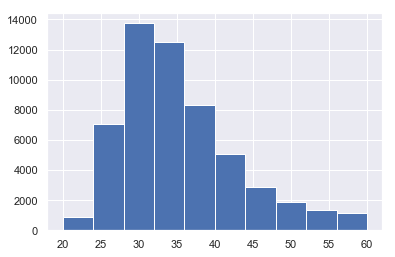

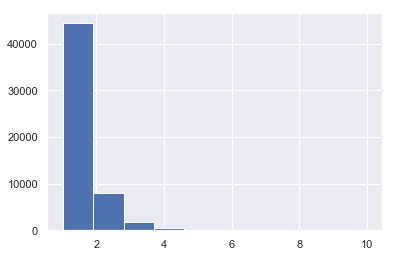

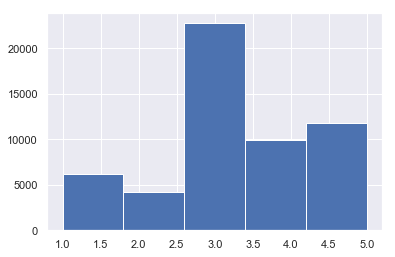

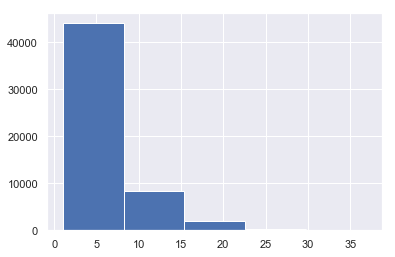

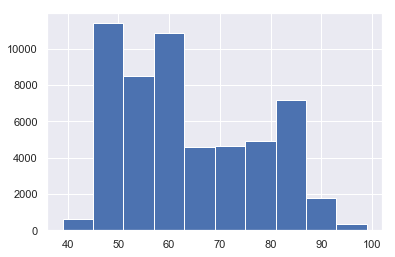

In [86]:
plt.hist(train.age, bins=10)
plt.show()
plt.hist(train.no_of_trainings, bins=10)
plt.show()
plt.hist(train.previous_year_rating, bins=5)
plt.show()
plt.hist(train.length_of_service,bins=5)
plt.show()
plt.hist(train.avg_training_score, bins=10)
plt.show()      

In [88]:
train.education.describe()

count          54808
unique             3
top       Bachelor's
freq           39384
Name: education, dtype: object

In [90]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


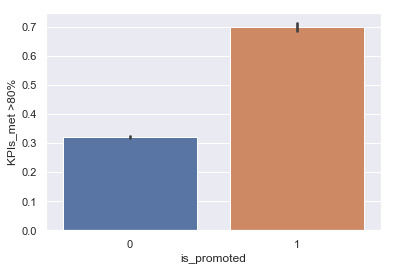

In [93]:
sns.barplot(x = 'is_promoted', y = 'KPIs_met >80%', data = train)

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


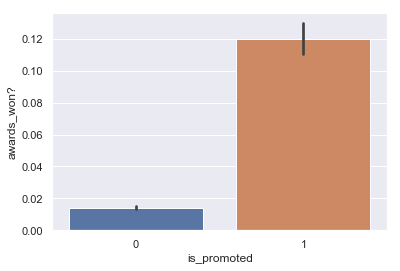

In [95]:
sns.barplot(x = 'is_promoted', y = 'awards_won?', data = train)

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


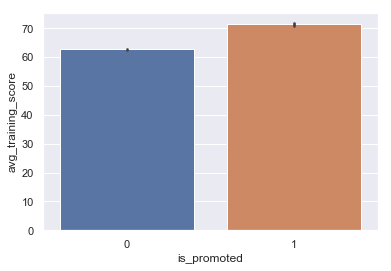

In [96]:
sns.barplot(x = 'is_promoted', y = 'avg_training_score', data = train)